# Making map plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.patches import Patch
import matplotlib as mpl

### Import the data

In [2]:
london = pd.read_csv('../data/london2022.csv')
merseyside = pd.read_csv('../data/merseyside2022.csv')

lsoa_shapes = gpd.read_file('../data/mapping_csvs/LSOA_boundaries/LSOA_2021_EW_BSC_V4.shp')


## Plot the MERSEYSIDE LSOA Stop count

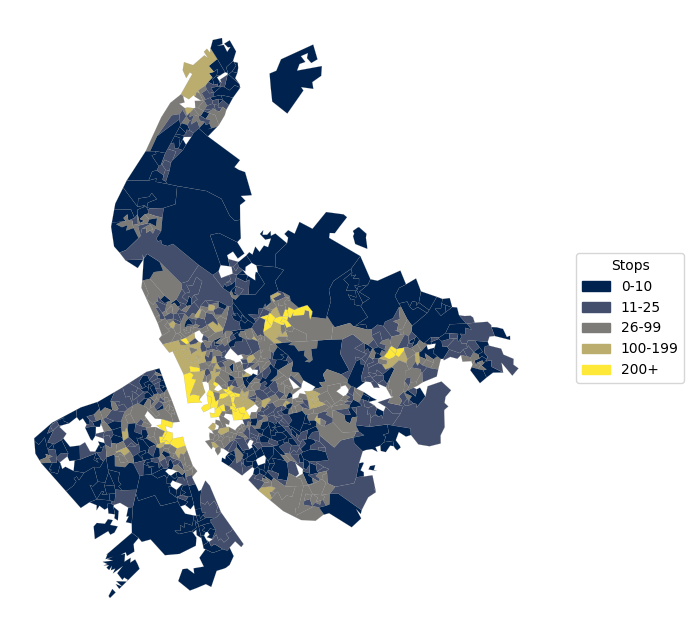

In [54]:
df_stops = merseyside['LSOA code'].value_counts().reset_index()
df_stops.columns = ['LSOA21CD', 'stop_counts']  # Match LSOA code column name

# Merge LSOA shapes with your stop and search data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_stops['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_stops, on='LSOA21CD', how='left')

# Define the bins and their labels
bins = [0, 10, 25, 99, 199, float('inf')]
bin_labels = ['0-10', '11-25', '26-99', '100-199', '200+']

# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='stop_counts', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
# ax.set_title("Number of Stop and Searches - LSOA Level")
plt.savefig('../figures_and_plots/merseyside_stops_map.svg', bbox_inches='tight')

plt.show()


## Plot the LONDON LSOA Stop count

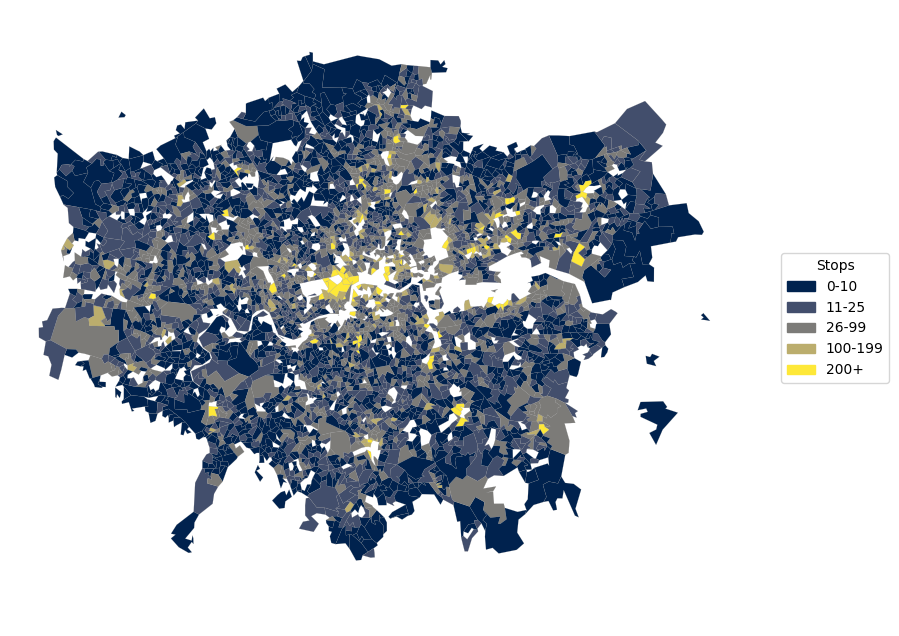

In [62]:
df_stops = london['LSOA code'].value_counts().reset_index()
df_stops.columns = ['LSOA21CD', 'stop_counts']  # Match LSOA code column name

# Merge LSOA shapes with your stop and search data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_stops['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_stops, on='LSOA21CD', how='left')

# Define the bins and their labels
bins = [0, 10, 25, 99, 199, float('inf')]
bin_labels = ['0-10', '11-25', '26-99', '100-199', '200+']

# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='stop_counts', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
plt.xlim(500000, 565000)  # Replace with your desired longitude range
plt.ylim(150000, 205000)  # Replace with your desired latitude range
plt.savefig('../figures_and_plots/london_stops_map.svg', bbox_inches='tight')

plt.show()


# Fixing the MISSING DATA

### London LSOA's

https://data.london.gov.uk/dataset/lsoa-atlas

In [47]:
xls = pd.read_excel('../data/mapping_csvs/london_LSOA.xls', 
                    sheet_name=0, 
                    engine='xlrd')


london_LSOAs = xls.iloc[2:, 0:1]
london_LSOAs.columns = ['LSOA21CD']
london_LSOAs = london_LSOAs.reset_index(drop=True)


london_LSOAs

,LSOA21CD
0,E01000907
1,E01000908
2,E01000909
3,E01000912
4,E01000913
...,...
4830,E01004328
4831,E01004329
4832,E01004330
4833,E01004331


C:\Users\15kof\AppData\Local\Temp\ipykernel_16556\3473643364.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_lsoas['stop_counts'].fillna(average_stop_count, inplace=True)


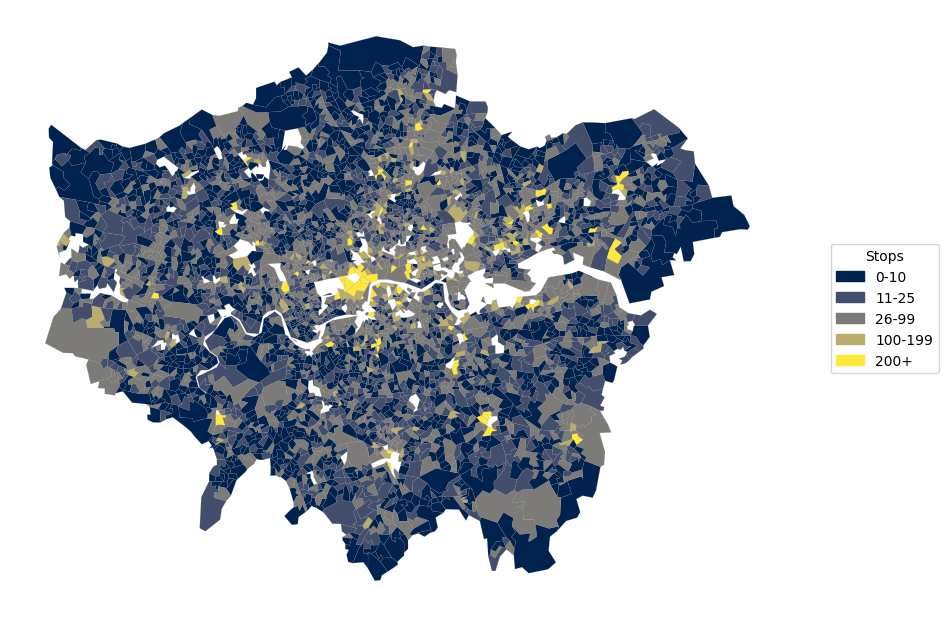

In [50]:
# london_LSOAs['LSOA21CD']

df_stops = london['LSOA code'].value_counts().reset_index()
df_stops.columns = ['LSOA21CD', 'stop_counts']  # Match LSOA code column name

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
# Assuming you have a list or dataframe of London LSOAs
london_LSOAs = london_LSOAs['LSOA21CD'].tolist()  # Replace with the actual list or dataframe of LSOA codes for London

# Filter lsoa_shapes to include only London LSOAs
london_lsoa_shapes = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(london_LSOAs)]

# Calculate the average stop count to fill missing values
average_stop_count = df_stops['stop_counts'].mean()

# Merge London LSOA shapes with your stop and search data, and fill NaN stop_counts with the average
merged_lsoas = london_lsoa_shapes.merge(df_stops, on='LSOA21CD', how='left')
merged_lsoas['stop_counts'].fillna(average_stop_count, inplace=True)

# Define the bins and their labels
bins = [0, 10, 25, 99, 199, float('inf')]
bin_labels = ['0-10', '11-25', '26-99', '100-199', '200+']

# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='stop_counts', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

ax.set_axis_off()

plt.show()

In [51]:
missing_lsoas = lsoa_shapes[~lsoa_shapes['LSOA21CD'].isin(london_LSOAs)]
print(f"Number of LSOAs in shapes but not in London LSOAs: {len(missing_lsoas)}")


Number of LSOAs in shapes but not in London LSOAs: 31013


# Plotting the HOUSE PRICES

## Merseyside

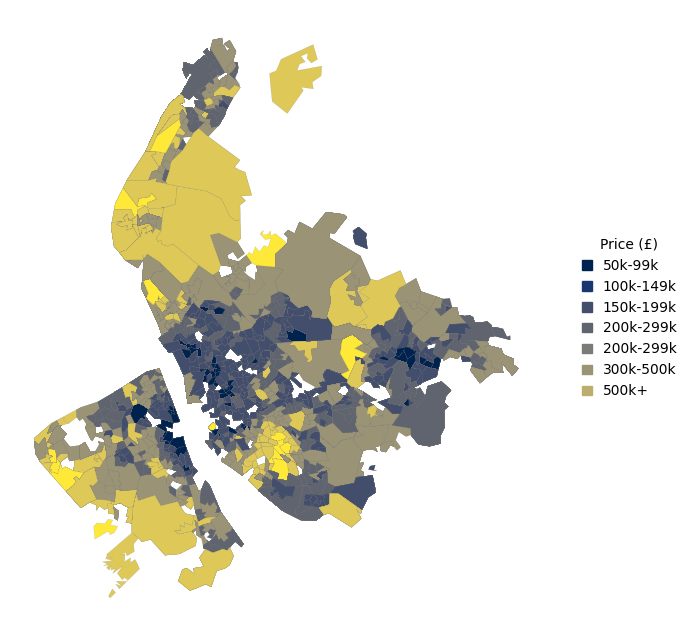

In [72]:


df_price = merseyside[['LSOA code','£_mean_house_price']]
df_price.columns = ['LSOA21CD', 'price']  # Match LSOA code column name

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_price['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_price, on='LSOA21CD', how='left')



# Define the bins and their labels
bins = [50000, 99999, 100000, 149999, 199999, 200000, 299999,  300000, 500000, float('inf')]
bin_labels = ['50k-99k', '100k-149k', '150k-199k', '200k-299k', '200k-299k', '300k-500k','500k+']


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='price', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Price (£)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## London

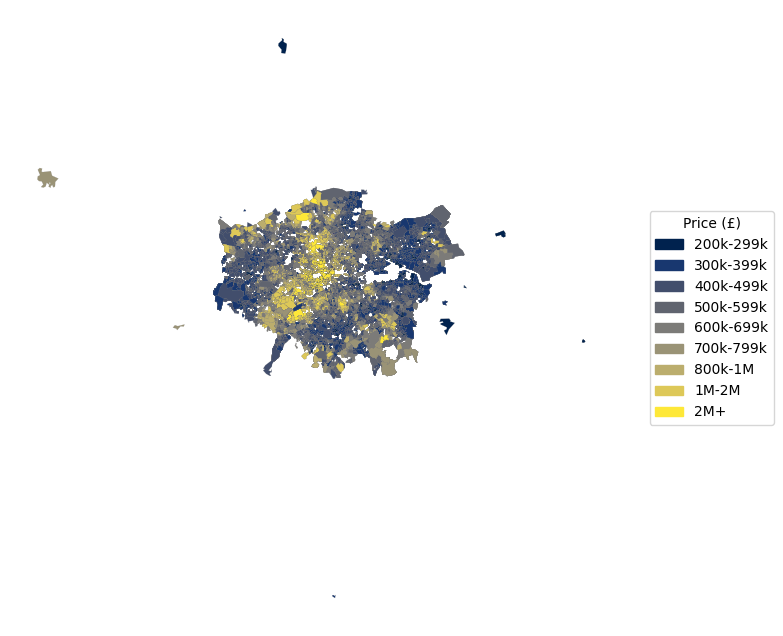

In [74]:


df_price = london[['LSOA code','£_mean_house_price']]
df_price.columns = ['LSOA21CD', 'price']  # Match LSOA code column name

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_price['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_price, on='LSOA21CD', how='left')



# Define the bins and their labels
bins = [200000, 299999, 400000, 500000, 600000, 700000, 800000, 1000000, 2000000, float('inf')]
bin_labels = ['200k-299k', '300k-399k', '400k-499k', '500k-599k', '600k-699k', '700k-799k', '800k-1M', '1M-2M', '2M+']


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='price', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, title="Price (£)", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
plt.savefig('../figures_and_plots/london_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## Add to other jup

In [ ]:
# Step 1: Get stop counts per LSOA
stop_counts = london['LSOA code'].value_counts().reset_index()
stop_counts.columns = ['LSOA21CD', 'stop_counts']  # Rename columns for clarity

# Step 2: Merge with population data
lsoas_population = london[['LSOA code', 'LSOA population']].rename(columns={'LSOA code': 'LSOA21CD'})
merged_lsoas = pd.merge(stop_counts, lsoas_population, on='LSOA21CD', how='left')

# Step 3: Calculate stops per area (stops per population)
merged_lsoas['stops_per_area'] = merged_lsoas['stop_counts'] / merged_lsoas['LSOA population'] * 100


# london['stops_per_LSOA'] = 

,LSOA21CD,stop_counts,LSOA population,stops_per_area
0,E01004734,2877,1699.0,169.334903
1,E01004734,2877,1699.0,169.334903
2,E01004734,2877,1699.0,169.334903
3,E01004734,2877,1699.0,169.334903
4,E01004734,2877,1699.0,169.334903
...,...,...,...,...
152472,E01002942,1,1403.0,0.071276
152473,E01000839,1,1358.0,0.073638
152474,E01000200,1,2008.0,0.049801
152475,E01004623,1,1771.0,0.056465
